In [80]:
import matplotlib.pyplot as plt
import numpy as np
import sdeint
import math
import warnings
warnings.filterwarnings("ignore")
g = 0.3
ω = np.pi/3
β = 0.01
Γ = 0.07
ϕ = 0
hbar = 1


# main function (including dissipation)
def f(t,y):
    x = y[0]
    p = y[1]
    χ = y[2]
    Π = y[3]
    sr = y[4]
    si = y[5]
    #V= -0.5*x**2+ 0.25*β*x**4
    f0 = p
    f1 = x - β ** 2 * x ** 3  - 2 * Γ * p - 3*x*β**2*χ**2+g*np.cos(ω * t)/β
    f2 = Π + Γ * ((χ - χ ** 3 + χ * Π ** 2 - 1 / (4 * χ)) * np.cos(2*ϕ) - Π * (-1 + 2*χ**2) * np.sin(2*ϕ) + χ - χ**3 - χ*Π**2 + 1/(4*χ))
    f3 = χ * (1 - 3 * β ** 2 * (x ** 2 + χ ** 2)) + 1 / (4 * χ ** 3) + Γ * ((Π ** 3 - Π + 3 * Π / (4 * χ ** 2) - Π * χ ** 2) * np.cos(2 * ϕ) - (-1 / (4 * χ ** 3) + 1 / χ - χ + 2 * χ * Π ** 2) * np.sin(2 * ϕ) + (-Π ** 3 - Π - 3 * Π / (4 * χ ** 2) - Π * χ ** 2))
    #f4 = p**2+0.5*(Π*(Π + Γ * ((χ - χ ** 3 + χ * Π ** 2 - 1 / (4 * χ)) * np.cos(2*ϕ) - Π * (-1 + 2*χ**2) * np.sin(2*ϕ) + χ - χ**3 - χ*Π**2 + 1/(4*χ)))-χ*(χ * (1 - 3 * β ** 2 * (x ** 2 + χ ** 2)) + 1 / (4 * χ ** 3) + Γ * ((Π ** 3 - Π + 3 * Π / (4 * χ ** 2) - Π * χ ** 2) * np.cos(2 * ϕ) - (-1 / (4 * χ ** 3) + 1 / χ - χ + 2 * χ * Π ** 2) * np.sin(2 * ϕ) + (-Π ** 3 - Π - 3 * Π / (4 * χ ** 2) - Π * χ ** 2))))-0.5*p**2-0.5*Π ** 2+0.5*x**2-0.25*β**2*x**4-0.75*β**2*χ ** 4+0.5*χ **2 - 1/(8*χ ** 2)-1.5*β**2*x**2*χ**2#E from new paper
    f4=1/(χ)**2*(-0.25-0.25*Γ*np.cos(ϕ) *np.sin(ϕ) +χ*(Γ*np.cos(ϕ) *np.sin(ϕ)*Π**2*χ+Γ*Π*(0.5-0.5*np.cos(2*ϕ)+(1+np.cos(2*ϕ))+χ+χ*p**2+0.5*x**2-β**2*x**4+1.5*β**2*χ**4+Γ*np.cos(ϕ) *np.sin(ϕ)*(1-χ**2))))-g*x*np.cos(ω * t)/β
     
    f5 = 1j*np.log(χ)
    return np.array([f0, f1, f2, f3, f4, f5])

In [81]:
from scipy.integrate import odeint
from scipy.integrate import complex_ode
from scipy.integrate import solve_ivp
X=[1,0.8,0.2,0.1,0.1,1j]
t0=0
tf=200
#def solve_it(k):
t_eval_arr = []
for i in range(tf):
    t_eval_arr.append(2*np.pi*i)
#print(t_eval_arr)
#t_eval_arr = np.array(t_eval_arr)
sol=solve_ivp(f, [t0, 2*tf*np.pi], X, t_eval=t_eval_arr)

In [82]:
sol_ar=sol.y.T

In [83]:
len(sol_ar)

200

In [84]:
sol_ar[1][1]

(45.41206427829436+0j)

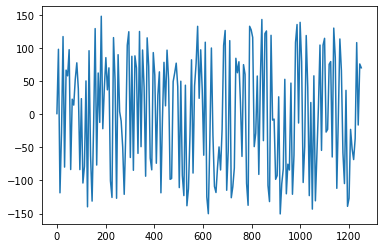

In [85]:
x_list=[]
for i in range(len(sol_ar)):
    x_list.append(float(sol_ar[i][0]))
plt.plot(sol.t,x_list)

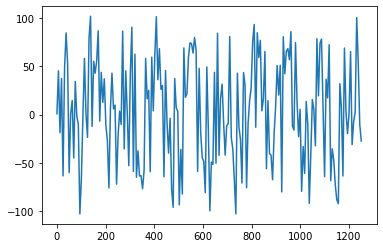

In [86]:
p_list=[]
for i in range(len(sol_ar)):
    p_list.append(float(sol_ar[i][1]))
plt.plot(sol.t,p_list)

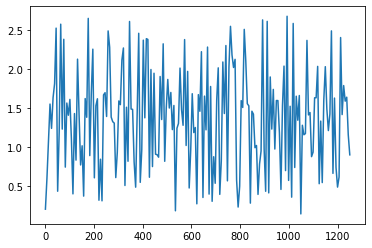

In [87]:
chi_list=[]
for i in range(len(sol_ar)):
    chi_list.append(float(sol_ar[i][2]))
plt.plot(sol.t,chi_list)

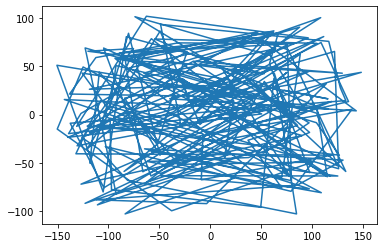

In [88]:
plt.plot(x_list,p_list)

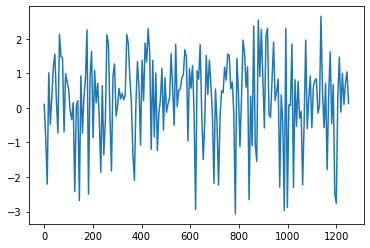

In [89]:
pi_list=[]
for i in range(len(sol_ar)):
    pi_list.append(float(sol_ar[i][3]))
plt.plot(sol.t,pi_list)

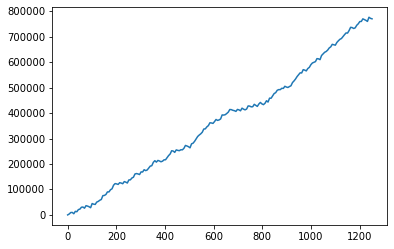

In [90]:
sr_list=[]
for i in range(len(sol_ar)):
    sr_list.append(float(sol_ar[i][4]))
plt.plot(sol.t,np.array(sr_list))

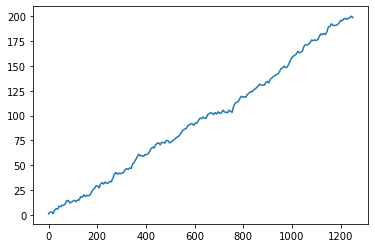

In [91]:
si_list=[]
for i in range(len(sol_ar)):
    si_list.append(sol_ar[i][5])
plt.plot(sol.t,np.imag(si_list))

In [92]:
import math

In [93]:
def integral(xt,x0,pt,p0,chit,chi0,pit,pi0, srt, sit, sr0,si0):
    A0=pi0/(2*chi0)-1j/(4*chi0**2)
    At=pit/(2*chit)+1j/(4*chit**2)
    s0=sr0+1j*si0
    st=1j*sit
    #print(A0-At)
    return (1/(np.sqrt(1/chi0**2 + (2*1j*pi0)/chi0 + (1 - 2*1j*chit*pit)/chit**2)))*2 *np.exp((-((1j*(2*chi0*pi0*(4*chit**2*pt + 1j*(x0 - xt) + 2*chit*pit*(x0 - xt))*(x0 - xt)+(x0 - xt)*(-4*1j*chit**2*pt + x0 - 2*1j*chit*pit*(x0 - xt) - xt) + 4*chi0**2*(chit**2*(p0 - pt)**2 - 1j*p0*(x0 - xt) + 2*chit*p0*pit*(-x0 + xt))))/(4*1j*chit**2 - 8*chi0*chit**2*pi0 + chi0**2 *(4*1j + 8* chit* pit)))))*np.sqrt(np.pi)*np.exp(1j*(math.fmod(srt+sr0,2*np.pi)+math.fmod(sit+si0,2*np.pi)))
           # *np.exp(1j*(math.fmod(srt+sr0,2*np.pi)+math.fmod(sit+si0,2*np.pi)))
#np.exp(-1j*np.pi/4)*np.exp(1j*(s0+st))/(np.sqrt(A0-At))

In [94]:
integration_l=[]
for i in range(len(sol_ar)):
    x=sol_ar[i][0]
    x0=X[0]
    p=sol_ar[i][1]
    p0=X[1]
    chi=sol_ar[i][2]
    chi0=X[2]
    pi=sol_ar[i][3]
    pi0=X[3]
    sr=sol_ar[i][4]
    si=sol_ar[i][5]
    sr0=X[4]
    si0=X[5]
    
    integration_l.append(integral(x,x0,p,p0,chi,chi0,pi,pi0, sr, si, sr0,si0))

In [95]:
integration_l

[(0.4913325190075402+0.09959803237458398j),
 -0j,
 0j,
 (-8.49976600589191e-92+1.3909976693477596e-91j),
 (-0+0j),
 -0j,
 (-5.6652726595387e-171+1.4549957835489492e-171j),
 (4.635425753554903e-62+3.7944492366231975e-61j),
 0j,
 0j,
 (2.1370715365791364e-09-5.713177401281546e-09j),
 (6.54004112547091e-76-8.535532884626814e-76j),
 (1.1877420090672238e-52-1.4146754129412783e-52j),
 (-0+0j),
 (1.2071595396075598e-82+2.1686079429602657e-82j),
 0j,
 (-5.3432079042289145e-118-2.3850622408119215e-117j),
 -0j,
 0j,
 (2.4520435291231305e-129+9.06293974868619e-130j),
 0j,
 (-1.158663e-318+8.0335e-320j),
 (-0+0j),
 0j,
 (-3.235522346092469e-116+8.474723125549512e-116j),
 0j,
 (-0+0j),
 (-3.3035161918412853e-252-8.83399124994423e-252j),
 (-0.0005315756912656527-0.0006122260725114281j),
 0j,
 (1.5392023404194725e-30-1.3465942451519172e-30j),
 (1.7773596591782018e-33-1.2165529947738099e-33j),
 0j,
 (3.8146177468560766e-108+8.926687739253175e-108j),
 (-3.5306752e-316+5.457942e-317j),
 0j,
 (-0+0j),
 0

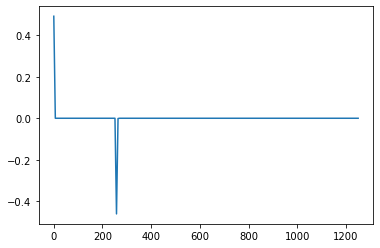

In [96]:
plt.plot(sol.t,integration_l)

In [97]:
len(sol.t)

200

Text(0.5, 1.0, 'fft driven')

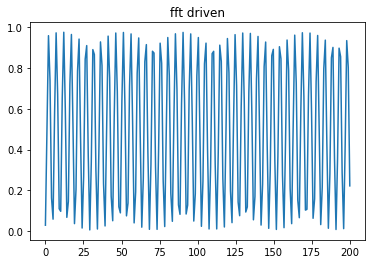

In [98]:
from scipy.fft import fft
fft_ar = np.fft.fft(integration_l)
y=np.array(fft_ar).real
plt.plot(np.linspace(0,len(sol.t),len(sol.t))[:],np.abs(y[:]))
plt.title('fft driven')

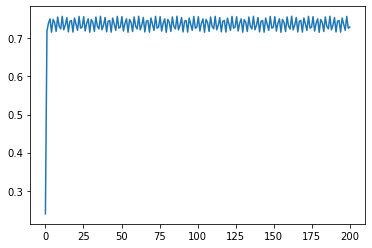

In [79]:
from scipy import signal
x = signal.lfilter([1,2], 2, y)
plt.plot(np.linspace(0,len(sol.t),len(sol.t))[:],x)

In [40]:
n=len(sol.t)
psd = y * np.conj(y)/n
#freq = (1/(dt*n)) * np.arange(n) #frequency array
idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32) #first half index

In [60]:
threshold = 100
psd_idxs = psd > threshold #array of 0 and 1
psd_clean = psd * psd_idxs #zero out all the unnecessary powers
fhat_clean = psd_idxs * y #used to retrieve the signal

signal_filtered = np.fft.ifft(fhat_clean) #inverse fourier transform

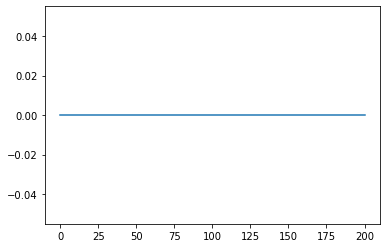

In [61]:
plt.plot(np.linspace(0,len(sol.t),len(sol.t))[:],signal_filtered)

In [682]:
from scipy.integrate import quad
def integrand(q,x,x0,p,p0,chi,chi0,pi,pi0, sr, si, sr0,si0):
    return (1j)*((q - x)*(pi/(2*chi) + 1j/(4/ chi**2)) *(q - x) + p*(q - x) + sr+si)*((-1j)*((q - x0)*(pi0/(2*chi0) - 1j/(4/ chi0**2)) *(q - x0) + p0*(q - x0) + sr0+si0))
def real_func(q,x,x0,p,p0,chi,chi0,pi,pi0, sr, si, sr0,si0):
        return np.real(integrand(q,x,x0,p,p0,chi,chi0,pi,pi0, sr, si, sr0,si0))
def imag_func(q,x,x0,p,p0,chi,chi0,pi,pi0, sr, si, sr0,si0):
    return np.imag(integrand(q,x,x0,p,p0,chi,chi0,pi,pi0, sr, si, sr0,si0))

In [80]:
integrated_l=[]
comb_ar=[]
for i in range(len(sol_ar)):
    x=sol_ar[i][0]
    x0=X[0]
    p=sol_ar[i][1]
    p0=X[1]
    chi=sol_ar[i][2]
    chi0=X[2]
    pi=sol_ar[i][3]
    pi0=X[3]
    sr=sol_ar[i][4]
    si=sol_ar[i][5]
    sr0=X[4]
    si0=X[5]
    
    
    
    real_integral = quad(real_func, -np.inf, np.inf, args=(x,x0,p,p0,chi,chi0,pi,pi0, sr, si, sr0,si0))
    imag_integral = quad(imag_func, -np.inf, np.inf, args=(x,x0,p,p0,chi,chi0,pi,pi0, sr, si, sr0,si0))
    comb_ar.append(real_integral[0] + 1j*imag_integral[0])
    #integrated_l.append(quad(integrand, -np.inf, np.inf, args=(x,x0,p,p0,chi,chi0,pi,pi0, sr, si, sr0,si0)))

KeyboardInterrupt: 

In [ ]:
plt.plot(sol.t,np.array(np.real(comb_ar))*10**(-69))

In [323]:
comb_ar

from scipy.fft import fft
fft_ar = fft(comb_ar)

In [324]:
y=np.array(fft_ar).real

In [327]:
y

array([-5.48529005e+69, -1.47526068e+69,  4.69255038e+69,  4.00118701e+69,
       -2.53930876e+69, -5.36827986e+69, -3.50660269e+68,  5.17826034e+69,
        3.13607669e+69, -3.49140065e+69, -5.01509083e+69,  7.93094045e+68,
        5.44291648e+69,  2.13724460e+69, -4.29154288e+69, -4.44582129e+69,
        1.89934519e+69,  5.46753210e+69,  1.04197537e+69, -4.90808846e+69,
       -3.68447339e+69,  2.92439417e+69,  5.25782805e+69, -9.46633722e+67,
       -5.30788338e+69, -2.76045736e+69,  3.82367641e+69,  4.81913445e+69,
       -1.22985002e+69, -5.48115256e+69, -1.72056645e+69,  4.55403718e+69,
        4.16995183e+69, -2.31110793e+69, -5.41421656e+69, -6.02399937e+68,
        5.09076027e+69,  3.34309366e+69, -3.29039681e+69, -5.11264125e+69,
        5.39756640e+68,  5.40312733e+69,  2.36724510e+69, -4.13033804e+69,
       -4.59125253e+69,  1.65842740e+69,  5.48295871e+69,  1.29202724e+69,
       -4.78714111e+69, -3.86711607e+69,  2.70740791e+69,  5.32530511e+69,
        1.59177313e+68, -

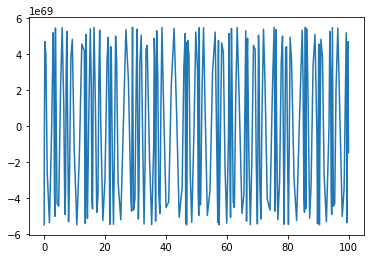

In [325]:
plt.plot(np.linspace,y)

In [289]:
#check integral for extreme values